In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

In [2]:
df = pd.read_csv(r'Tesla.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [4]:
df['Date']

0       6/29/2010
1       6/30/2010
2        7/1/2010
3        7/2/2010
4        7/6/2010
          ...    
1687    3/13/2017
1688    3/14/2017
1689    3/15/2017
1690    3/16/2017
1691    3/17/2017
Name: Date, Length: 1692, dtype: object

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0      2010-06-29
1      2010-06-30
2      2010-07-01
3      2010-07-02
4      2010-07-06
          ...    
1687   2017-03-13
1688   2017-03-14
1689   2017-03-15
1690   2017-03-16
1691   2017-03-17
Name: Date, Length: 1692, dtype: datetime64[ns]

In [6]:
df.set_index('Date',inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1692 entries, 2010-06-29 to 2017-03-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1692 non-null   float64
 1   High       1692 non-null   float64
 2   Low        1692 non-null   float64
 3   Close      1692 non-null   float64
 4   Volume     1692 non-null   int64  
 5   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 92.5 KB


In [10]:
df.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2017-03-06', '2017-03-07', '2017-03-08', '2017-03-09',
               '2017-03-10', '2017-03-13', '2017-03-14', '2017-03-15',
               '2017-03-16', '2017-03-17'],
              dtype='datetime64[ns]', name='Date', length=1692, freq=None)

In [11]:
df.shape

(1692, 6)

In [12]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [13]:
df['Close']

Date
2010-06-29     23.889999
2010-06-30     23.830000
2010-07-01     21.959999
2010-07-02     19.200001
2010-07-06     16.110001
                 ...    
2017-03-13    246.169998
2017-03-14    258.000000
2017-03-15    255.729996
2017-03-16    262.049988
2017-03-17    261.500000
Name: Close, Length: 1692, dtype: float64

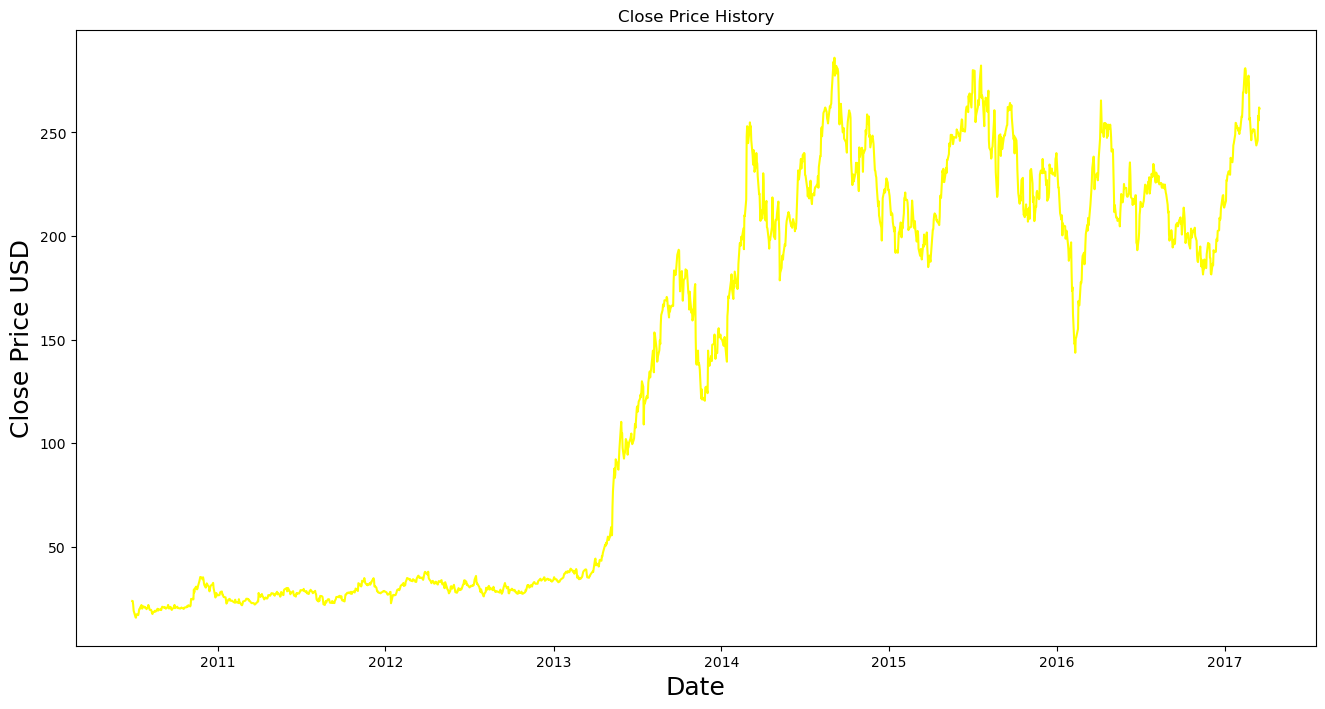

In [14]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'], color='yellow')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

In [15]:
data = df.filter(['Close'])

In [16]:
data

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001
...,...
2017-03-13,246.169998
2017-03-14,258.000000
2017-03-15,255.729996


In [17]:
data.values

array([[ 23.889999],
       [ 23.83    ],
       [ 21.959999],
       ...,
       [255.729996],
       [262.049988],
       [261.5     ]])

In [18]:
dataset = data.values

In [19]:
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1354

In [20]:
scaler = MinMaxScaler(feature_range=(0,1))

In [21]:
scaled_data = scaler.fit_transform(dataset)

In [22]:
scaled_data

array([[0.02993635],
       [0.02971433],
       [0.02279455],
       ...,
       [0.88784039],
       [0.91122698],
       [0.9091918 ]])

In [26]:
train_data = scaled_data[0:training_data_len]

In [27]:
train_data

array([[0.02993635],
       [0.02971433],
       [0.02279455],
       ...,
       [0.77534782],
       [0.74267315],
       [0.75222023]])

In [28]:
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])

In [32]:
x_train

[array([0.02993635, 0.02971433, 0.02279455, 0.01258141, 0.00114713,
        0.        , 0.00614268, 0.00592066, 0.00462551, 0.00865897,
        0.01494967, 0.01513469, 0.01791   , 0.02260953, 0.01665186,
        0.01635583, 0.01924215, 0.02031528, 0.01905714, 0.01757696,
        0.01820603, 0.01683689, 0.01531972, 0.01894612, 0.02275755,
        0.02020426, 0.01720693, 0.01402457, 0.01406157, 0.01195234,
        0.00777087, 0.00666075, 0.00932504, 0.01102724, 0.01239639,
        0.01099023, 0.01106424, 0.01221137, 0.01602279, 0.01258141,
        0.0151717 , 0.01461664, 0.01443162, 0.01506069, 0.01361752,
        0.01720693, 0.01946418, 0.01942717, 0.01753997, 0.01887211,
        0.01816903, 0.01617081, 0.01820603, 0.01968621, 0.02286856,
        0.01902013, 0.01639284, 0.01946418, 0.01839106, 0.01506069]),
 array([0.02971433, 0.02279455, 0.01258141, 0.00114713, 0.        ,
        0.00614268, 0.00592066, 0.00462551, 0.00865897, 0.01494967,
        0.01513469, 0.01791   , 0.02260953, 0.

In [34]:
import numpy as np
np.array(x_train).shape

(1294, 60)

In [35]:
y_train

[0.013913554154743983,
 0.015911781589675718,
 0.0175029634490576,
 0.02072232020981022,
 0.022868560517254867,
 0.01705891002986163,
 0.017761988751265924,
 0.019205150337306263,
 0.01968620789973404,
 0.017243927045606337,
 0.017132918316325248,
 0.017132918316325248,
 0.01642983959492097,
 0.01642983959492097,
 0.01753996759228941,
 0.01831705089974297,
 0.01753996759228941,
 0.01639283545168916,
 0.015726757173102367,
 0.017947009467424925,
 0.01831705089974297,
 0.018206034769633235,
 0.018687092332061013,
 0.020574307337297336,
 0.019242154480538072,
 0.01994523690235666,
 0.022350502512009603,
 0.020759324353042043,
 0.020167258061333175,
 0.022091473509386984,
 0.03367377034094162,
 0.03197158345269297,
 0.03396980348679606,
 0.032674654773268606,
 0.050177621922740535,
 0.0452930750161424,
 0.0519538170974528,
 0.05550621114729166,
 0.05132474666251214,
 0.050658672084339655,
 0.052138834113197495,
 0.05620929356911026,
 0.06512729948880366,
 0.06945677684609611,
 0.0727871534

In [36]:
x_train,y_train = np.array(x_train), np.array(y_train)

In [37]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1294, 60, 1)

In [38]:
model =Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))

In [39]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [40]:
model.fit(x_train,y_train, batch_size=1, epochs=10)

Epoch 1/10
1294/1294 [==============================] - 25s 16ms/step - loss: 0.0027
Epoch 2/10
1294/1294 [==============================] - 19s 14ms/step - loss: 0.0014
Epoch 3/10
1294/1294 [==============================] - 19s 14ms/step - loss: 9.9037e-04
Epoch 4/10
1294/1294 [==============================] - 19s 15ms/step - loss: 7.9811e-04
Epoch 5/10
1294/1294 [==============================] - 19s 15ms/step - loss: 6.4687e-04
Epoch 6/10
1294/1294 [==============================] - 19s 15ms/step - loss: 6.9265e-04
Epoch 7/10
1294/1294 [==============================] - 19s 14ms/step - loss: 5.7507e-04
Epoch 8/10
1294/1294 [==============================] - 19s 14ms/step - loss: 6.2767e-04
Epoch 9/10
1294/1294 [==============================] - 19s 15ms/step - loss: 5.3744e-04
Epoch 10/10
1294/1294 [==============================] - 20s 15ms/step - loss: 5.8235e-04


In [43]:
test_data= scaled_data[training_data_len-60:]
test_data

array([[0.88606421],
       [0.83769977],
       [0.79547808],
       [0.75144312],
       [0.75573561],
       [0.7735346 ],
       [0.84069715],
       [0.86101239],
       [0.86315864],
       [0.82456334],
       [0.85808908],
       [0.85024422],
       [0.83677466],
       [0.85986527],
       [0.8626036 ],
       [0.86101239],
       [0.86752515],
       [0.87844136],
       [0.87984754],
       [0.91196711],
       [0.91130106],
       [0.90593542],
       [0.91918296],
       [0.90711957],
       [0.90756361],
       [0.91518645],
       [0.89220691],
       [0.86082736],
       [0.85424062],
       [0.86071635],
       [0.82918886],
       [0.85764505],
       [0.85239042],
       [0.83503552],
       [0.79988159],
       [0.78049139],
       [0.7581779 ],
       [0.73926878],
       [0.75284929],
       [0.74407933],
       [0.76047214],
       [0.78156449],
       [0.78559798],
       [0.72983271],
       [0.71895348],
       [0.72498518],
       [0.71525307],
       [0.738

In [44]:
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [45]:
x_test = np.array(x_test)

In [46]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(338, 60, 1)

In [47]:
x_test.shape[0]

338

In [48]:
x_test[0].shape

(60, 1)

In [49]:
x_test.shape[1]

60

In [50]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

11/11 [==============================] - 1s 16ms/step


In [51]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.37576424544656023

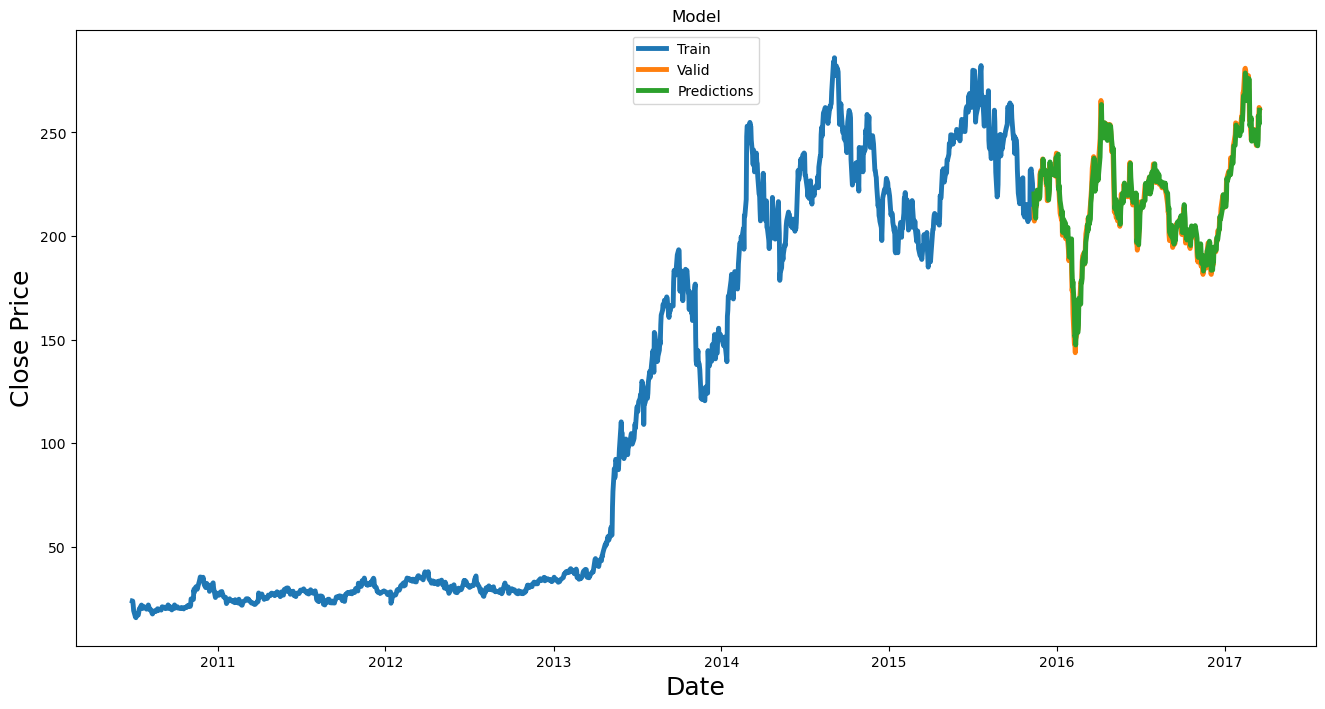

In [52]:
import warnings
warnings.filterwarnings('ignore')


train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['Close'],linewidth=3.5)
plt.plot(valid[['Close','Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'], loc='upper center')
plt.show()

In [53]:
valid

,Close,Predictions
Date,,
2015-11-12,212.940002,220.312439
2015-11-13,207.190002,213.932037
2015-11-16,214.309998,208.597092
2015-11-17,214.000000,216.367081
2015-11-18,221.070007,215.194260
...,...,...
2017-03-13,246.169998,243.514984
2017-03-14,258.000000,246.214355
2017-03-15,255.729996,258.142609
